In [43]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import scmdata
import seaborn as sns
import numpy as np
import pandas as pd

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv(
    str(Path(utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta.csv"))
)
OUTPUT_FILE = Path(utils.DATA_DIR / "plotting_data" / "histogram" / f"{ID}.csv")

<IPython.core.display.Javascript object>

In [46]:
data.columns

Index(['2030_warming', '2100_warming', 'SRM_at_first_crossing', 'TCRE',
       'average_annual_emissions_2030_net-zero',
       'average_cdr_between_net0_and_15', 'climate_model',
       'cumulative_emms_15', 'cumulative_emms_net0_to_15',
       'cumulative_emms_peak_warming', 'cumulative_emms_peak_warming_to_15',
       'cumulative_pos_emms_at_15', 'cumulative_pos_emms_at_net0',
       'ensemble_member', 'max_assigned_CDR', 'max_deployed_CDR', 'model',
       'ms', 'net-zero_year', 'net_CDR_at_15_temp', 'peak_warming', 'region',
       'run_id', 'scenario', 'total_CDR', 'unit', 'variable',
       'year_return_back_below_15_temp'],
      dtype='object')

<IPython.core.display.Javascript object>

## Quick plots

In [47]:
srm_years_pdf = data[  # .filter(ms=ten_ms)
    [
        "SRM_at_first_crossing",
        "ms",
        "ensemble_member",
        "year_return_back_below_15_temp",
        "2100_warming",
        "max_deployed_CDR",
        "average_cdr_between_net0_and_15",
    ]
].drop_duplicates()
display(srm_years_pdf.head())

,SRM_at_first_crossing,ms,ensemble_member,year_return_back_below_15_temp,2100_warming,max_deployed_CDR,average_cdr_between_net0_and_15
0,327,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,0,2382,2.489039,-13774.970781,12868.518933
3,309,AIM/CGE 2.1CD-LINKS_NDC2030i_1000,0,2364,2.147834,-22975.485840,17799.101034
6,169,AIM/CGE 2.2EN_INDCi2030_1000f,0,2213,1.980358,-5639.315272,5754.528269
9,217,AIM/CGE 2.2EN_INDCi2030_1200,0,2260,2.089920,-3649.715688,2436.594569
12,180,AIM/CGE 2.2EN_INDCi2030_1200f,0,2224,2.085738,-2576.314430,3350.472297


<IPython.core.display.Javascript object>

#### How many pathways deploy no SRM

In [6]:
srm_years_pdf.year_return_back_below_15_temp.value_counts(normalize=True)[1111]

0.0470268972142171

<IPython.core.display.Javascript object>

#### How many pathways don't end SRM before 2500

In [7]:
srm_years_pdf.year_return_back_below_15_temp.value_counts()[9999]  # normalize=True

32199

<IPython.core.display.Javascript object>

In [48]:
SRM_depl = srm_years_pdf[
    (srm_years_pdf["year_return_back_below_15_temp"] < 9999)
    & (srm_years_pdf["year_return_back_below_15_temp"] > 1111)
]
noSRM_depl = srm_years_pdf[(srm_years_pdf["year_return_back_below_15_temp"] == 1111)]
longSRM_depl = srm_years_pdf[(srm_years_pdf["year_return_back_below_15_temp"] == 9999)]

<IPython.core.display.Javascript object>

In [49]:
SRM_depl.describe()

,SRM_at_first_crossing,ensemble_member,year_return_back_below_15_temp,2100_warming,max_deployed_CDR,average_cdr_between_net0_and_15
count,166210.000000,166210.000000,166210.00000,166210.000000,166210.000000,165867.000000
mean,168.139294,302.657060,2219.13667,2.045834,-12265.522170,9339.375570
std,105.895122,172.195628,112.96370,0.550061,8467.833206,6581.159745
min,0.000000,0.000000,2036.00000,0.844996,-39492.245033,0.000000
25%,84.000000,154.000000,2128.00000,1.646078,-16824.113288,4577.136939
50%,145.000000,304.000000,2194.00000,1.946224,-11128.945203,8311.822747
75%,240.000000,453.000000,2295.00000,2.342614,-5976.981783,12688.804509
max,469.000000,599.000000,2500.00000,5.996979,0.000000,35855.879097


<IPython.core.display.Javascript object>

In [104]:
current_pol = srm_years_pdf[
    (srm_years_pdf["2100_warming"] >= 2.35) & (srm_years_pdf["2100_warming"] <= 2.45)
]
# how many current policy scenarios don't end SRM before 2500
srm_years_pdf[
    (srm_years_pdf["2100_warming"] >= 2.35) & (srm_years_pdf["2100_warming"] <= 2.45)
].year_return_back_below_15_temp.value_counts()[9999]

1804

<IPython.core.display.Javascript object>

In [95]:
current_targets = SRM_depl[
    (SRM_depl["2100_warming"] >= 1.75) & (SRM_depl["2100_warming"] <= 1.85)
]
# how many current policy scenarios don't end SRM before 2500
print(
    srm_years_pdf[
        (srm_years_pdf["2100_warming"] >= 1.95)
        & (srm_years_pdf["2100_warming"] <= 2.05)
    ].year_return_back_below_15_temp.value_counts()[9999]
)
# print(
#     srm_years_pdf[
#         (srm_years_pdf["2100_warming"] >= 1.95)
#         & (srm_years_pdf["2100_warming"] <= 2.05)
#     ].year_return_back_below_15_temp.value_counts()[1111]
# )

980


<IPython.core.display.Javascript object>

In [96]:
current_targets["SRM_at_first_crossing"].describe()

count    14186.000000
mean       155.889609
std         81.741189
min         21.000000
25%         96.000000
50%        120.000000
75%        195.000000
max        460.000000
Name: SRM_at_first_crossing, dtype: float64

<IPython.core.display.Javascript object>

In [101]:
CDR_lim = current_targets[current_targets["average_cdr_between_net0_and_15"] < 10000]

<IPython.core.display.Javascript object>

In [102]:
CDR_lim["average_cdr_between_net0_and_15"].describe()

count    9103.000000
mean     5694.637442
std      2750.233178
min         0.000000
25%      3584.321709
50%      5833.483346
75%      8242.722864
max      9997.198124
Name: average_cdr_between_net0_and_15, dtype: float64

<IPython.core.display.Javascript object>

In [103]:
CDR_lim["SRM_at_first_crossing"].describe()

count    9103.000000
mean      174.821707
std        85.114714
min        31.000000
25%       106.000000
50%       143.000000
75%       230.000000
max       460.000000
Name: SRM_at_first_crossing, dtype: float64

<IPython.core.display.Javascript object>

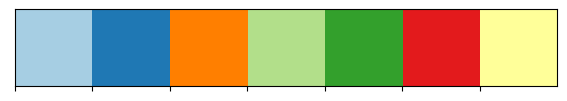

<IPython.core.display.Javascript object>

In [60]:
colors = [
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[1],
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[2],
    sns.color_palette("Paired")[3],
    sns.color_palette("Paired")[5],
    sns.color_palette("Paired")[10],
]
sns.palplot(colors)

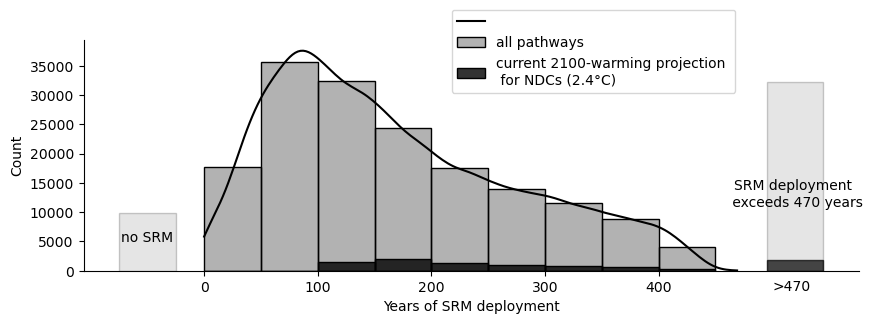

<IPython.core.display.Javascript object>

In [61]:
fig, ax = plt.subplots(figsize=(10, 3))

ax = sns.histplot(
    data=SRM_depl,
    x="SRM_at_first_crossing",
    #  hue="ms",
    bins=range(0, 500, 50),
    kde=True,
    alpha=0.3,
    stat="count",
    color="black",
)

ax = sns.histplot(
    data=current_pol,
    x="SRM_at_first_crossing",
    #  hue="ms",
    bins=range(0, 500, 50),
    kde=False,
    stat="count",
    color="black",
    legend=True,
    alpha=0.8,
)
plt.rcParams["patch.force_edgecolor"] = True
ax.bar(
    -50,
    (srm_years_pdf.year_return_back_below_15_temp.value_counts()[1111]),
    color="grey",
    alpha=0.2,
    width=50,
)
ax.bar(
    520,
    (srm_years_pdf.year_return_back_below_15_temp.value_counts()[9999]),
    color="grey",
    alpha=0.2,
    width=50,
)
ax.bar(
    520,
    (
        srm_years_pdf[
            (srm_years_pdf["2100_warming"] >= 2.35)
            & (srm_years_pdf["2100_warming"] <= 2.45)
        ].year_return_back_below_15_temp.value_counts()[9999]
    ),
    color="black",
    alpha=0.7,
    width=50,
)

# plt.text(-60, 0.005, "no SRM", rotation=90)
# plt.text(515, 0.005, "SRM deployment exceeds 470 years", rotation=90)
# plt.text(490, -0.0125, ">470")
plt.text(-50, 5000, "no SRM", rotation=0, horizontalalignment="center")
plt.text(
    520,
    11000,
    "SRM deployment \n exceeds 470 years",
    rotation=0,
    horizontalalignment="center",
)
plt.text(500, -3400, ">470")

plt.xticks(np.arange(0, 470, 100))
plt.xlabel("Years of SRM deployment")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)

# add legend
ax.legend(
    labels=[
        "",
        "all pathways",
        "current 2100-warming projection \n for NDCs (2.4°C)",
    ],
    bbox_to_anchor=(0.85, 0.95),
    loc="center right",
)